In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin, pi
from scipy.integrate import solve_ivp, odeint, quad
from mpl_toolkits import mplot3d

In [2]:
class edo :
    # initialisation
    def __init__(self,f,γ,a,b) : 
        self.f = f
        self.γ = γ
        self.a = a
        self.b = b
        
    def F(self,U,t) : return [U[1],U[2], U[3], self.f(t) - self.γ * U[0]]

    def sol_en_b(self,u1a,u3a) : return odeint(self.F,[0,u1a,0,u3a],[self.a,self.b])[1]
    
    def graph(self,u1a,u3a) : 
        abs_exp = np.linspace(self.a,self.b,20)
        plt.scatter(abs_exp,odeint(self.F,[0,u1a,0,u3a],abs_exp).T [0],color="orange",marker="+")

    def G(self,x,y) : 
        t=self.sol_en_b(x,y)
        return t[0]**2+t[2]**2 
        #return [t[0],t[2]]

In [3]:
e1=edo(lambda x : x**2,0,-pi,pi)
print(e1.G(20.401312319018754,-10.335425560099939))
print(e1.G(pi**5/15,-pi**3/3))

#20.401312319018754
#-10.335425560099939

1.8852441523600209e-16
1.7135774619667606e-16


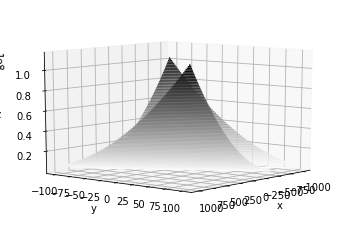

In [4]:
#Initialisation du graphe en 3D
fig=plt.figure()
ax=plt.axes(projection="3d")

#Discrétisation en abscisses et ordonnées
x=np.linspace(-1000,1000,100)
y=np.linspace(-100,100,100)

#Création des différents points de maillage
X,Y=np.meshgrid(x,y)

#Calcul de la fonction à partir de tous les points
Z=np.zeros((np.size(x),np.size(y)))
for i in range(np.size(x)) :
    for j in range(np.size(y)) :
        Z[i,j]=e1.G(x[i],y[j])

#Tracé de la surface
ax.contour3D(X,Y,Z.T,100,cmap='binary')

#Noms des axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#Point de vue de la figure (arg1 : rotation pour voir dessus, arg2 : rotation pour voir côtés)
ax.view_init(10,40)

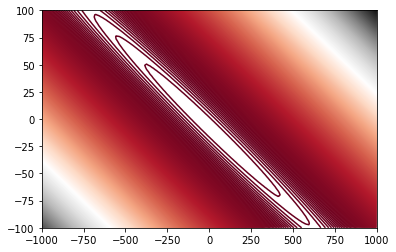

In [5]:
plt.contour(X,Y,Z.T,1050,cmap="RdGy")